In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Tarea proc de imagenes - Benjamin Parraguez

#Fuentes:
#02_proc_imagenes_1.5.pdf
#03_mejoramiento_espacio_1.4.pdf
#14_funcion_gamma.py - Códigos del curso
#16_ecualizacion_colores.py - Códigos del curso


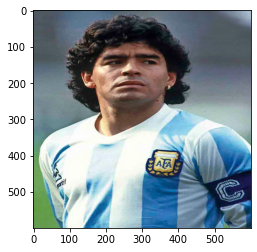

In [9]:
#Pregunta 1, desplegamos la imagen y la transformamos para que este en sus colores originales
img = cv2.imread('DiegoMaradona.png') #Cargamos el archivo

imgColor = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Transformamos de BGR A RGB para desplegar imagen origial

plt.imshow(imgColor)
plt.show()

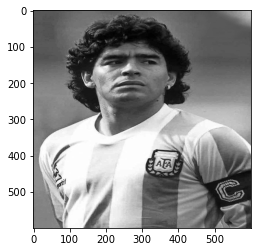

In [10]:
#Pregunta 2 transformamos la imagen a niveles de gris con la funcion BRG2GRAY

img_gris = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gris, cmap="gray")
plt.show()

In [11]:
#Pregunta 3 separamos los canales + creacion de archivos

blue, green, red = cv2.split(img) #sacamos los canales de la imagen

cv2.imwrite('ImagenNuevaBlue.png',blue) #Creamos los archivos correspondientes
cv2.imwrite('ImagenNuevaGreen.png',green)
cv2.imwrite('ImagenNuevaRed.png',red)

True

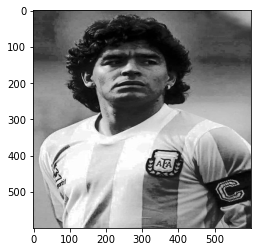

In [16]:
#Pregunta 4 Canal verde ecualizado
EcHisGreen = cv2.equalizeHist(green) #Ecualizamos el histograma del canal verde
plt.imshow(EcHisGreen,  cmap="gray") #Lo mostramos por pantalla
plt.show()

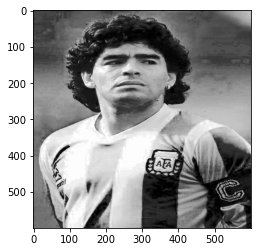

In [17]:
#Pregunta 4 Canal Rojo ecualizado
EcHisRed = cv2.equalizeHist(red) #Ecualizamos el histograma del canal verde
plt.imshow(EcHisRed,  cmap="gray") #Lo mostramos por pantalla
plt.show()



In [19]:
#Pregunta 5 Definimos la funcion gamma y asignamos los valores 1.4 y 0.6
def gamma_correction(img, factor): #funcion que permite calcular la funcion gamma
    img = img/255.0
    img = cv2.pow(img, factor)
    return np.uint8(img*255)

GammaAzulV14 = gamma_correction(blue, 1.4) #le damos como parametros la imagen con canal azul, con valor gamma de 1.4
GammaAzulV06 = gamma_correction(blue,0.6) #le damos como parametros la imagen con canal azul, con valor gamma de 0.6

cv2.imwrite('ImagenNuevaGammaAzulV14.png',GammaAzulV14) #Generamos Gamma Azul con valor 1.4 en los archivos
cv2.imwrite('ImagenNuevaGammaAzulV06.png',GammaAzulV06) #Generamos Gamma Azul con valor 0.6 en los archivos

True

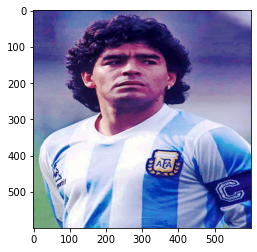

In [26]:
#Pregunta 6 Creacion de una matriz de 600 x 600 que es del tamaño original de la imagen para poder reconsturirla-
#La matriz tiene 0 en su interior.
#Se construye la imagen con los elementos requeridos y en su respectiva escala.
GammaAzul_V06 = np.zeros((600,600, 3), dtype = 'uint8') #

GammaAzul_V06[:,:,0] = EcHisRed #Ecualizacion Roja
GammaAzul_V06[:,:,1] = EcHisGreen #Ecualizacion Verde
GammaAzul_V06[:,:,2] = GammaAzulV06 # Gamma Azul de un valor de 0.6
plt.imshow(GammaAzul_V06) #Desplegamos la nueva imagen
plt.show()


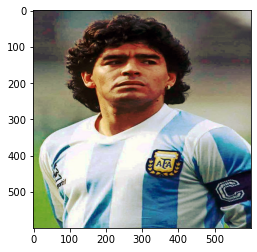

In [29]:
#Pregunta 6 Realizamos el mismo proceso pero esta vez para el valor del gamma azul de 1.4
GammaAzul_V14 = np.zeros((600,600, 3), dtype = 'uint8')

GammaAzul_V14[:,:,0] = EcHisRed
GammaAzul_V14[:,:,1] = EcHisGreen
GammaAzul_V14[:,:,2] = GammaAzulV14
plt.imshow(GammaAzul_V14)
plt.show()
